# Bibliotécas

In [1]:
import inflection
import re
import pandas                      as pd
import numpy                       as np
import seaborn                     as sns
from statsmodels     import api    as sm
from matplotlib      import pyplot as plt
from IPython.display import HTML
import warnings

warnings.filterwarnings('ignore')

In [2]:
#pip install statsmodels

# Funções

In [3]:
def jupyter_settings():
    %matplotlib inline

    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [20, 9]
    plt.rcParams['font.size'] = 24

    display(HTML('<style>.container{width: 100% !important;}</style>'))
    
    pd.options.display.max_rows = None
    pd.options.display.max_columns = None
    pd.set_option('display.expand_frame_repr', False)

    sns.set()

    # Aumenta a quantidade de texto mostrado nas células de saída
    from IPython.core.interactiveshell import InteractiveShell
    InteractiveShell.ast_node_interactivity = 'all'
jupyter_settings()

def renomear_colunas(df):
    title = lambda x: inflection.titleize(x)
    snakecase = lambda x: inflection.underscore(x)
    spaces = lambda x: x.replace(" ", "")
    cols_old = list(df.columns)
    cols_old = list(map(title, cols_old))
    cols_old = list(map(spaces, cols_old))
    cols_new = list(map(snakecase, cols_old))
    df.columns = cols_new
    return df

def descricao_estatistica(df):
    #Métricas de tendência central: média e mediana
    central_1 = pd.DataFrame(df.apply(np.mean)).T
    central_2 = pd.DataFrame(df.apply(np.median)).T
    
    #Métricas de dispersão: desvio padrão, mínimo, máximo, aplitude, assimetrica e curtose
    dispersao_1 = pd.DataFrame(df.apply(np.std)).T
    dispersao_2 = pd.DataFrame(df.apply(np.min)).T
    dispersao_3 = pd.DataFrame(df.apply(np.max)).T
    dispersao_4 = pd.DataFrame(df.apply(lambda x: x.max() - x.min())).T
    dispersao_5 = pd.DataFrame(df.apply(lambda x: x.skew())).T
    dispersao_6 = pd.DataFrame(df.apply(lambda x: x.kurtosis())).T
    
    metricas = pd.concat([dispersao_2, dispersao_3, dispersao_4, central_1, central_2, dispersao_1, dispersao_5, dispersao_6]).T
    metricas.columns = ['min', 'max', 'amplitude', 'mean', 'median', 'std', 'assimetria', 'kurtosis']
    return metricas

# 1. Passo 1: Descrição dos dados

### 1.2 Carregar os dados

In [4]:
ls -la ../

total 40
drwxr-xr-x  6 leonardo leonardo 4096 Feb  6 15:26 ./
drwxr-xr-x 11 leonardo leonardo 4096 Feb  2 19:15 ../
drwxr-xr-x  8 leonardo leonardo 4096 Feb  3 00:09 .git/
-rw-r--r--  1 leonardo leonardo 3078 Feb  2 19:28 .gitignore
drwxr-xr-x  2 leonardo leonardo 4096 Feb  2 19:32 .ipynb_checkpoints/
-rw-r--r--  1 leonardo leonardo   22 Feb  2 19:24 .python-version
-rw-r--r--  1 leonardo leonardo 1080 Feb  2 19:28 LICENSE
-rw-r--r--  1 leonardo leonardo   23 Feb  2 19:28 README.md
drwxr-xr-x  2 leonardo leonardo 4096 Feb  9 19:43 dataset/
drwxr-xr-x  3 leonardo leonardo 4096 Feb  9 19:45 notebook/


In [5]:
path = '/home/leonardo/projetos_/elasticidade_de_preco/dataset' # Caminho absoluto para posteriormente
# utilizar o PaperMill (Executador de jupyter notebook)
df_raw = pd.read_csv(path + '/df_ready.csv')

In [6]:
df1 = df_raw.copy()

In [7]:
df1 = df_raw.drop(columns={'Unnamed: 0', 'Date_imp', 'Cluster', 'condition', 
                           'sourceURLs', 'Date_imp_d.1', 'Zscore_1', 'price_std',
                           'imageURLs', 'shipping', 'weight', 'currency'})

### 1.3 Dimensão dos dados

In [8]:
df1.shape

(23151, 20)

### 1.4 Editar as colunas

In [9]:
df1 = renomear_colunas(df1)

### 1.5 Tipo de dados

In [10]:
df1.dtypes

date_imp_d          object
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
date_added          object
date_seen           object
date_updated        object
manufacturer        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
dtype: object

#### 1.5.1 Editar os tipos de dados

In [11]:
# invoice_date
df1['date_imp_d'] = pd.to_datetime(df1['date_imp_d'])

### 1.6 Verificar NA's

In [12]:
df1.head(2)

,date_imp_d,category_name,name,price,disc_price,merchant,disc_percentage,is_sale,imp_count,brand,p_description,date_added,date_seen,date_updated,manufacturer,day_n,month,month_n,day,week_number
0,2017-12-14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.0,64.99,Walmart.com,0.06,Yes,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-12-14T06:00:00Z,2018-06-13T19:39:02Z,Boytone,Thursday,12,December,14,50
1,2017-09-08,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.0,69.00,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-09-08T05:00:00Z,2018-06-13T19:39:02Z,Boytone,Friday,9,September,8,36


In [13]:
df1.isna().sum()

date_imp_d             0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
date_added             0
date_seen              0
date_updated           0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

### 1.7 Descrição estatística do negócio

#### 1.7.1 Separar as colunas em variáveis numéricas e variáveis categóricas

In [14]:
atributos_numericos = df1.select_dtypes(include = ['int64', 'float64'])
atributos_categoricos = df1.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]'])

#### 1.7.2 Atributos numéricos

In [15]:
descricao_estatistica(atributos_numericos)

,min,max,amplitude,mean,median,std,assimetria,kurtosis
price,1.0,10879.95,10878.95,513.037803,199.99,859.091448,4.595160,34.411146
disc_price,1.0,10879.95,10878.95,494.104295,199.00,808.571509,4.748349,39.612839
disc_percentage,0.0,0.80,0.80,0.016933,0.00,0.077847,5.217632,28.754920
imp_count,1.0,31.00,30.00,6.560926,5.00,5.403049,1.286351,1.639569
month,1.0,12.00,11.00,7.651030,8.00,2.592787,-0.099417,-0.628859
day,1.0,31.00,30.00,15.693879,16.00,9.681413,0.032258,-1.331838
week_number,1.0,51.00,50.00,31.342750,32.00,11.316253,-0.266980,-0.648027


#### 1.7.3 Atributos categóricos

In [16]:
atributos_categoricos.head(2)

,category_name,name,merchant,is_sale,brand,p_description,date_added,date_seen,date_updated,manufacturer,day_n,month_n
0,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,Walmart.com,Yes,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-12-14T06:00:00Z,2018-06-13T19:39:02Z,Boytone,Thursday,December
1,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,Walmart.com,No,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-09-08T05:00:00Z,2018-06-13T19:39:02Z,Boytone,Friday,September


# 2. Passo 2: Análise exploratória dos dados

In [17]:
df2 = df1.copy()

### 2.1 Qual o comerciante que mais vendeu?

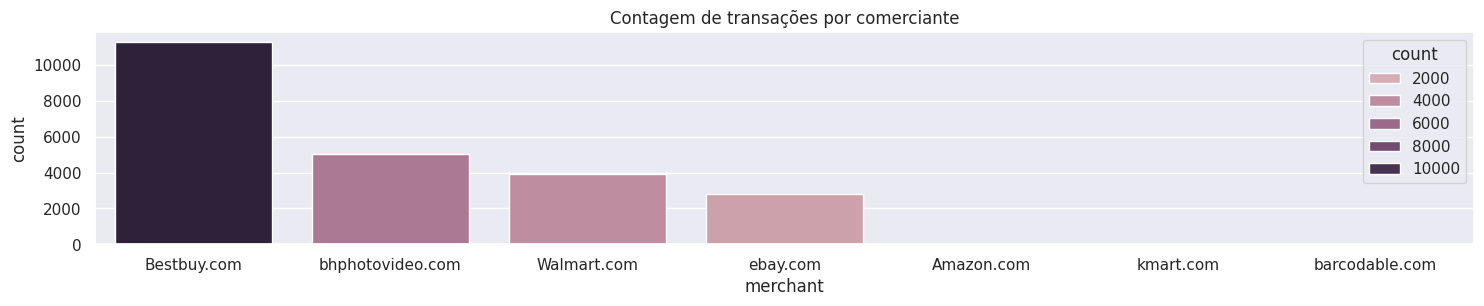

In [18]:
plt.figure(figsize = (15, 3)) #Ajuste o tamanho conforme necessário

comerciante = pd.DataFrame(df2['merchant'].value_counts()).reset_index()
sns.barplot(x = 'merchant', y = 'count', hue = 'count', data = comerciante)
plt.tight_layout()
plt.title('Contagem de transações por comerciante');

### 2.2 Qual a categoria mais vendida?

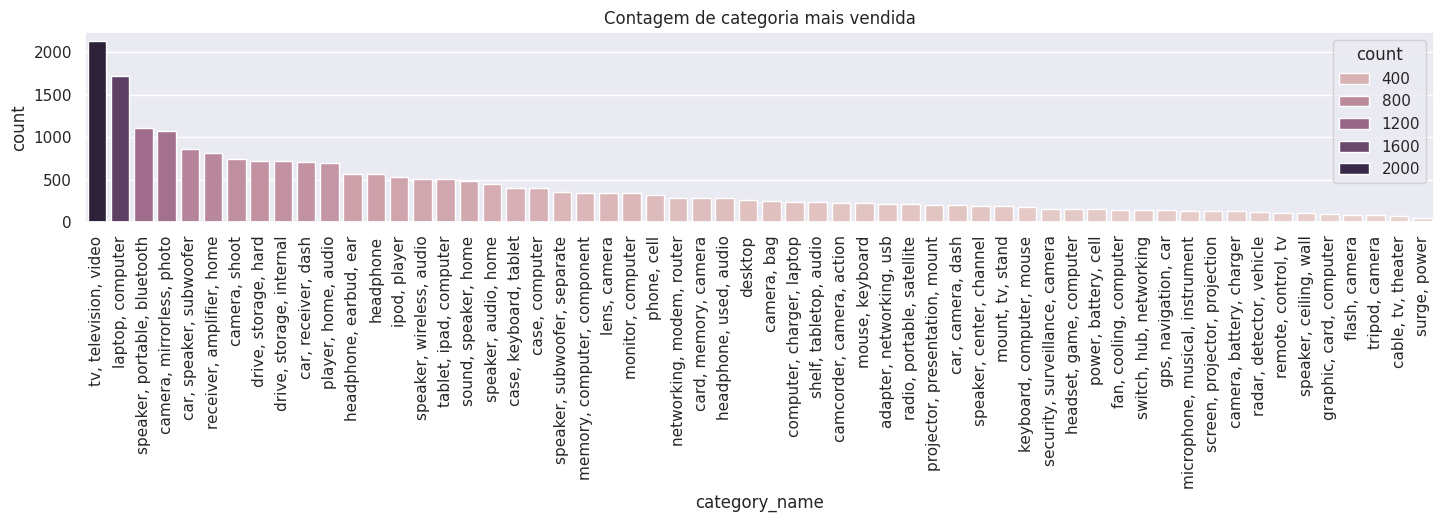

In [19]:
plt.figure(figsize = (15, 3)) #Ajuste o tamanho conforme necessário

categoria = pd.DataFrame(df2['category_name'].value_counts()).reset_index()
sns.barplot(x = 'category_name', y = 'count', hue = 'count', data = categoria)
plt.title('Contagem de categoria mais vendida')
plt.tight_layout()
plt.xticks(rotation = 90);

### 2.3 Qual a categoria mais vendida por comerciante?

In [20]:
df_best = df2.loc[df2['merchant'] == 'Bestbuy.com', :]
df_bhp = df2.loc[df2['merchant'] == 'bhphotovideo.com', :]
df_walmart = df2.loc[df2['merchant'] == 'Walmart.com', :]
df_ebay = df2.loc[df2['merchant'] == 'ebay.com', :]

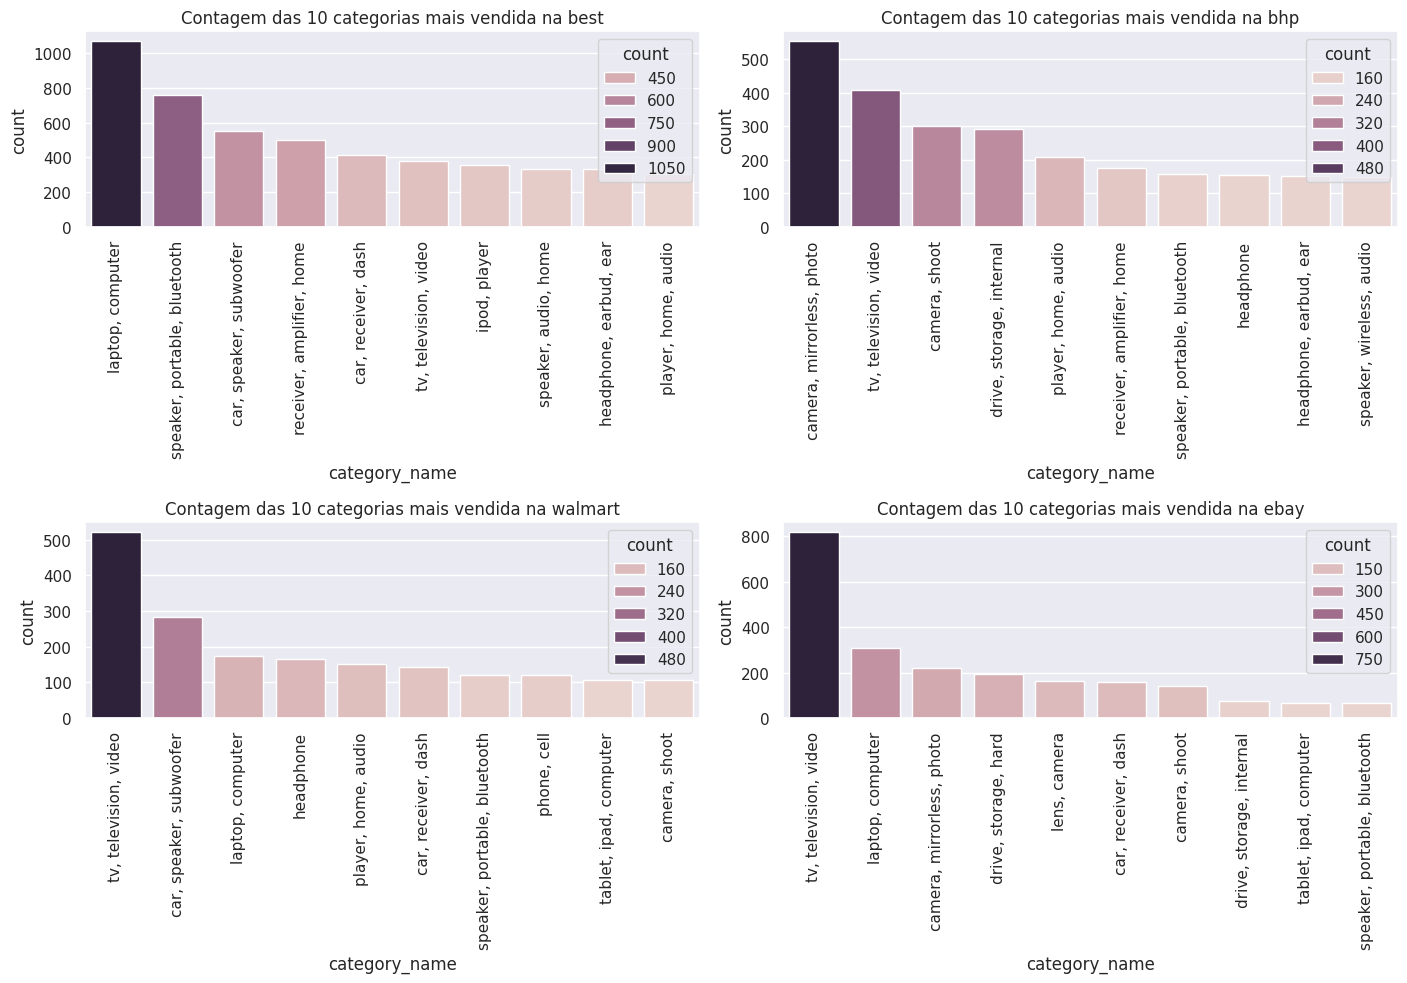

In [21]:
plt.figure(figsize = (15, 10)) #Ajuste o tamanho conforme necessário

plt.subplot(2, 2, 1)
categoria_best = df_best.value_counts('category_name').reset_index()
sns.barplot(x = 'category_name', y = 'count', hue = 'count', data = categoria_best.head(10))
plt.title('Contagem das 10 categorias mais vendida na best')
plt.tight_layout()
plt.xticks(rotation = 90);

plt.subplot(2, 2, 2)
categoria_bhp = df_bhp.value_counts('category_name').reset_index()
sns.barplot(x = 'category_name', y = 'count', hue = 'count', data = categoria_bhp.head(10))
plt.title('Contagem das 10 categorias mais vendida na bhp')
plt.tight_layout()
plt.xticks(rotation = 90);

plt.subplot(2, 2, 3)
categoria_walmart = df_walmart.value_counts('category_name').reset_index()
sns.barplot(x = 'category_name', y = 'count', hue = 'count', data = categoria_walmart.head(10))
plt.title('Contagem das 10 categorias mais vendida na walmart')
plt.tight_layout()
plt.xticks(rotation = 90);

plt.subplot(2, 2, 4)
categoria_ebay = df_ebay.value_counts('category_name').reset_index()
sns.barplot(x = 'category_name', y = 'count', hue = 'count', data = categoria_ebay.head(10))
plt.title('Contagem das 10 categorias mais vendida na ebay')
plt.tight_layout()
plt.xticks(rotation = 90);

### 2.4 Qual a marca mais vendida?

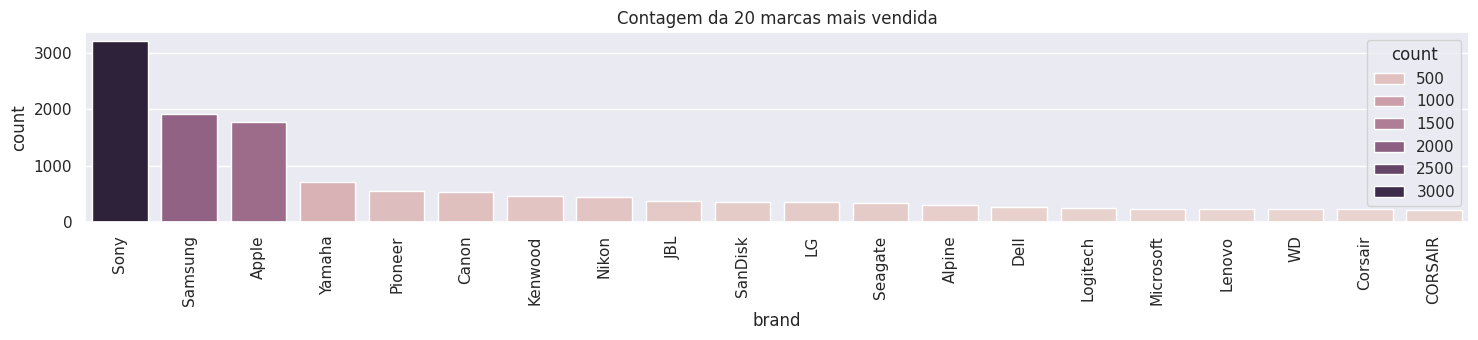

In [22]:
plt.figure(figsize = (15, 3)) #Ajuste o tamanho conforme necessário

marca = pd.DataFrame(df2['brand'].value_counts()).reset_index()
sns.barplot(x = 'brand', y = 'count', hue = 'count', data = marca.head(20))
plt.title('Contagem da 20 marcas mais vendida')
plt.tight_layout()
plt.xticks(rotation = 90);

### 2.5 Qual a marca mais vendida por comerciante?

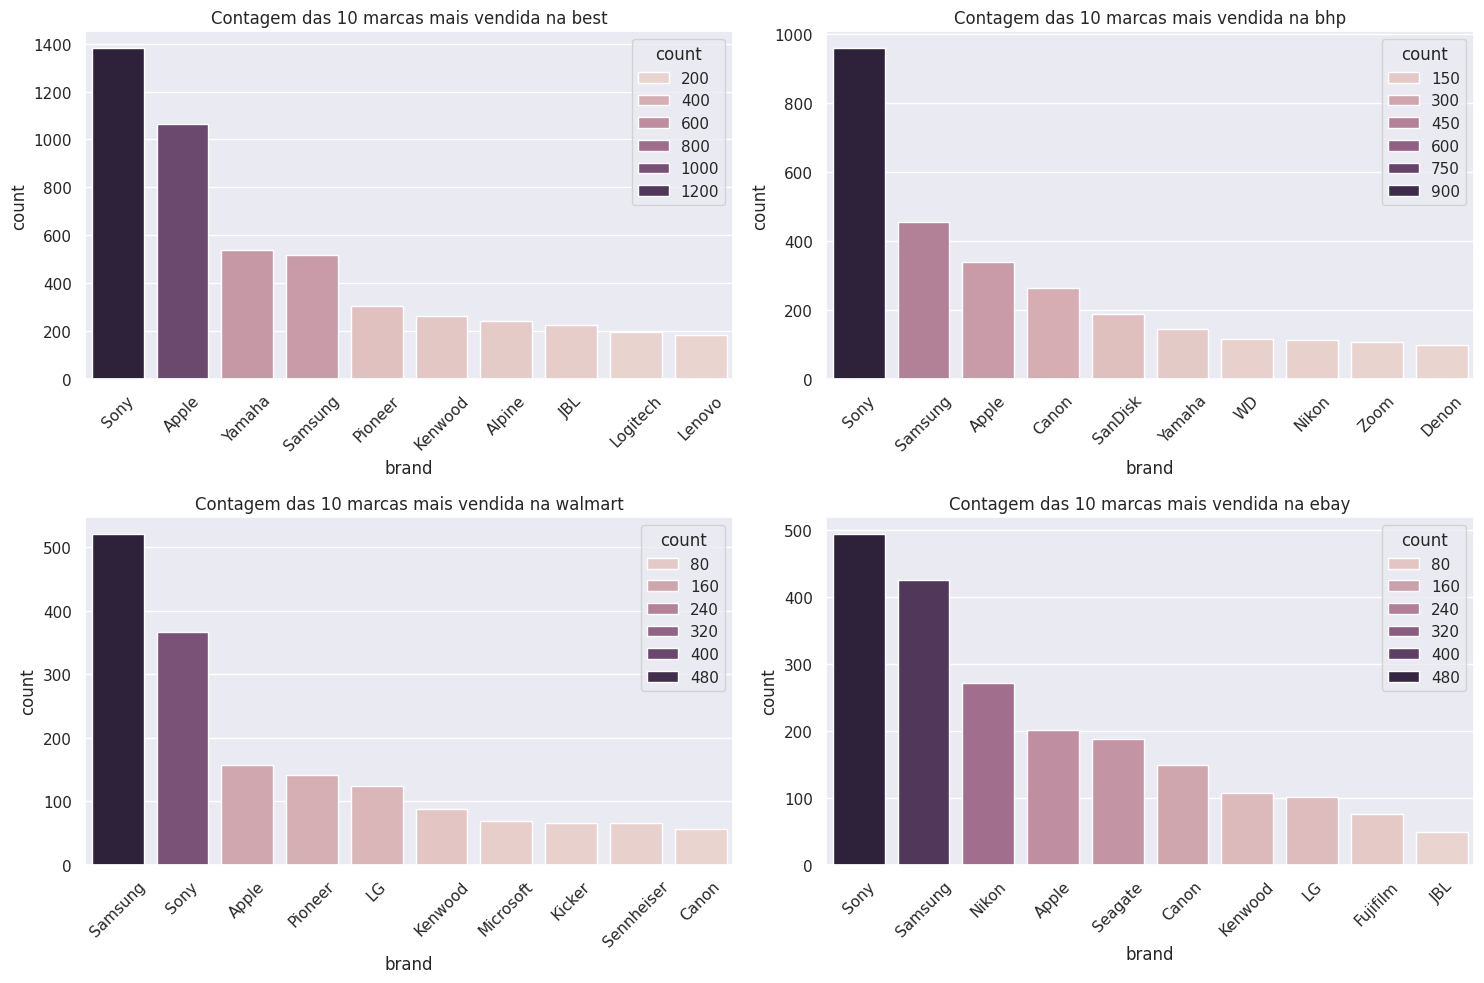

In [23]:
plt.figure(figsize = (15, 10)) #Ajuste o tamanho conforme necessário

plt.subplot(2, 2, 1)
marca_best = df_best.value_counts('brand').reset_index()
sns.barplot(x = 'brand', y = 'count', hue = 'count', data = marca_best.head(10))
plt.title('Contagem das 10 marcas mais vendida na best')
plt.tight_layout()
plt.xticks(rotation = 45);

plt.subplot(2, 2, 2)
marca_bhp = df_bhp.value_counts('brand').reset_index()
sns.barplot(x = 'brand', y = 'count', hue = 'count', data = marca_bhp.head(10))
plt.title('Contagem das 10 marcas mais vendida na bhp')
plt.tight_layout()
plt.xticks(rotation = 45);

plt.subplot(2, 2, 3)
marca_walmart = df_walmart.value_counts('brand').reset_index()
sns.barplot(x = 'brand', y = 'count', hue = 'count', data = marca_walmart.head(10))
plt.title('Contagem das 10 marcas mais vendida na walmart')
plt.tight_layout()
plt.xticks(rotation = 45);

plt.subplot(2, 2, 4)
marca_ebay = df_ebay.value_counts('brand').reset_index()
sns.barplot(x = 'brand', y = 'count', hue = 'count', data = marca_ebay.head(10))
plt.title('Contagem das 10 marcas mais vendida na ebay')
plt.tight_layout()
plt.xticks(rotation = 45);

### 2.6 Quais os dias que mais vendem?

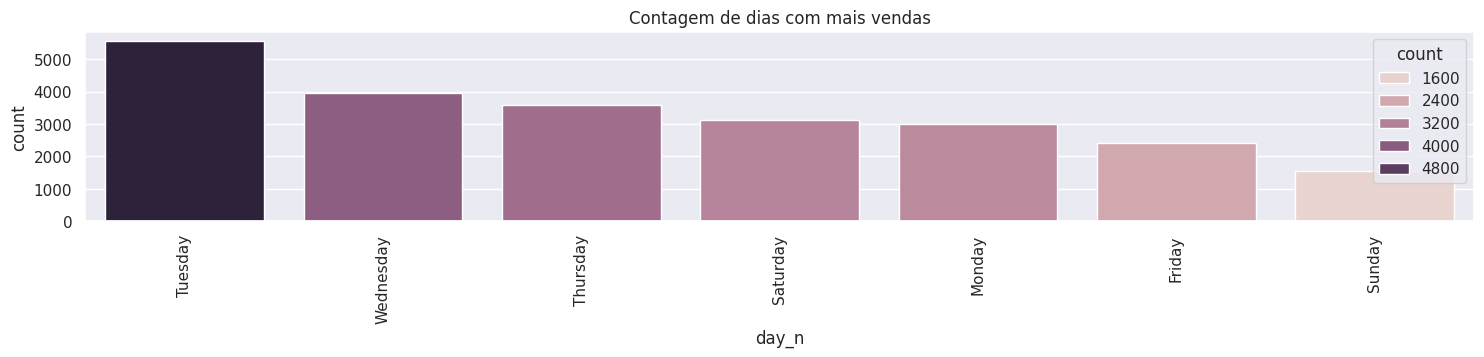

In [24]:
plt.figure(figsize = (15, 3)) #Ajuste o tamanho conforme necessário

dias = pd.DataFrame(df2['day_n'].value_counts()).reset_index()
sns.barplot(x = 'day_n', y = 'count', hue = 'count', data = dias)
plt.title('Contagem de dias com mais vendas')
plt.tight_layout()
plt.xticks(rotation = 90);

### 2.7 Quais os dias que mais vendem por comerciante?

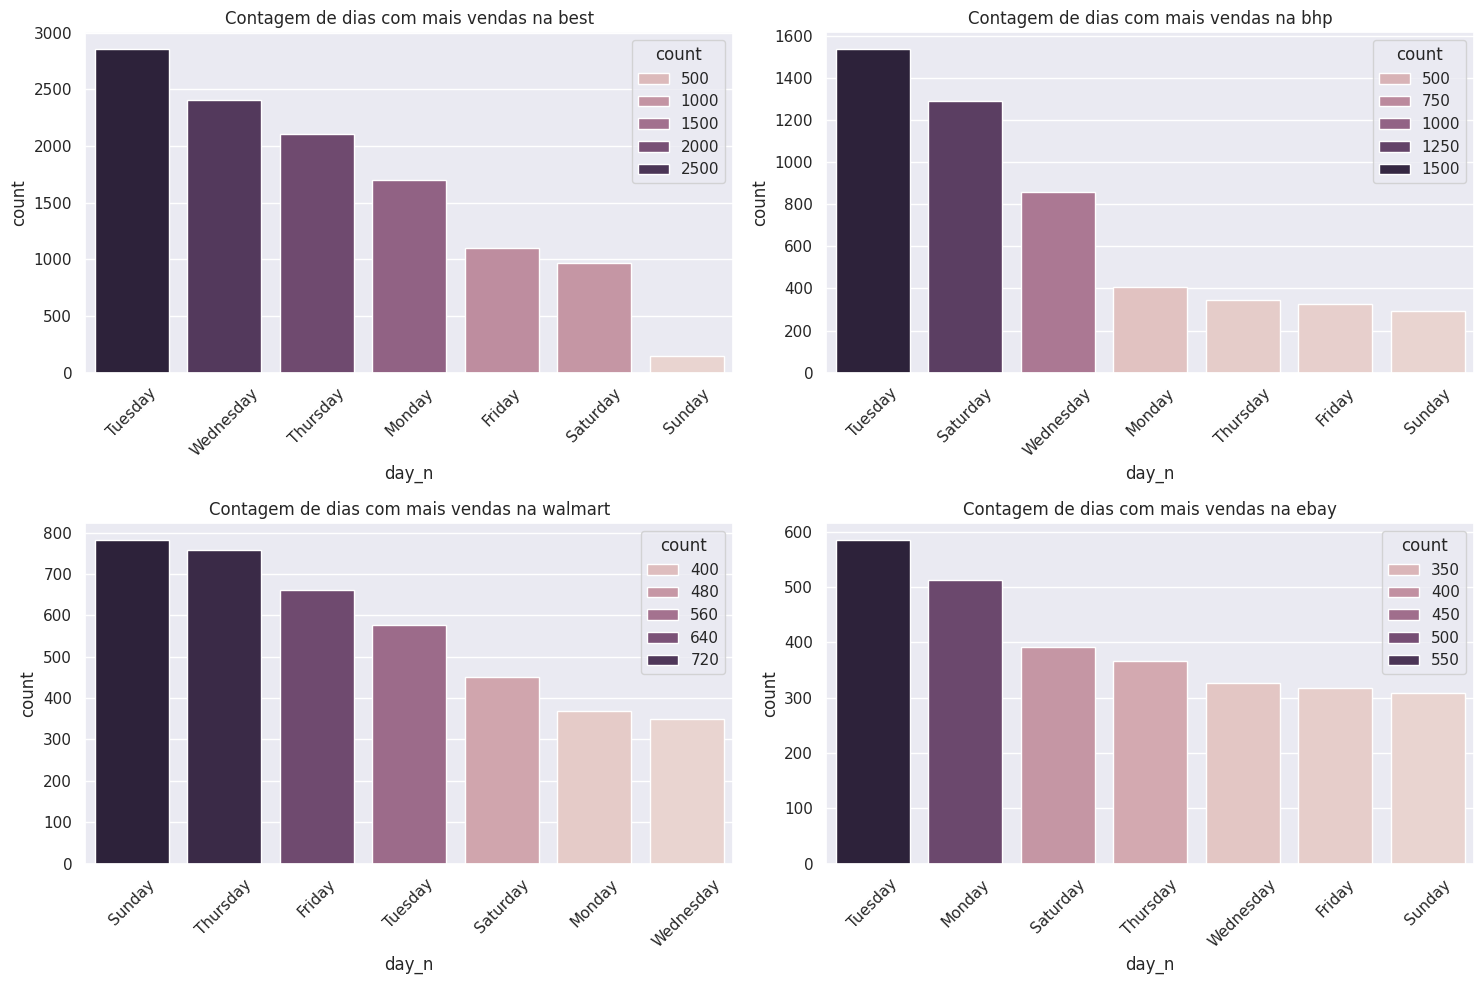

In [25]:
plt.figure(figsize = (15, 10)) #Ajuste o tamanho conforme necessário

plt.subplot(2, 2, 1)
dia_best = df_best.value_counts('day_n').reset_index()
sns.barplot(x = 'day_n', y = 'count', hue = 'count', data = dia_best)
plt.title('Contagem de dias com mais vendas na best')
plt.tight_layout()
plt.xticks(rotation = 45);

plt.subplot(2, 2, 2)
dia_bhp = df_bhp.value_counts('day_n').reset_index()
sns.barplot(x = 'day_n', y = 'count', hue = 'count', data = dia_bhp)
plt.title('Contagem de dias com mais vendas na bhp')
plt.tight_layout()
plt.xticks(rotation = 45);

plt.subplot(2, 2, 3)
dia_walmart = df_walmart.value_counts('day_n').reset_index()
sns.barplot(x = 'day_n', y = 'count', hue = 'count', data = dia_walmart)
plt.title('Contagem de dias com mais vendas na walmart')
plt.tight_layout()
plt.xticks(rotation = 45);

plt.subplot(2, 2, 4)
dia_ebay = df_ebay.value_counts('day_n').reset_index()
sns.barplot(x = 'day_n', y = 'count', hue = 'count', data = dia_ebay)
plt.title('Contagem de dias com mais vendas na ebay')
plt.tight_layout()
plt.xticks(rotation = 45);

### 2.8 Quais as semanas que mais vendem?

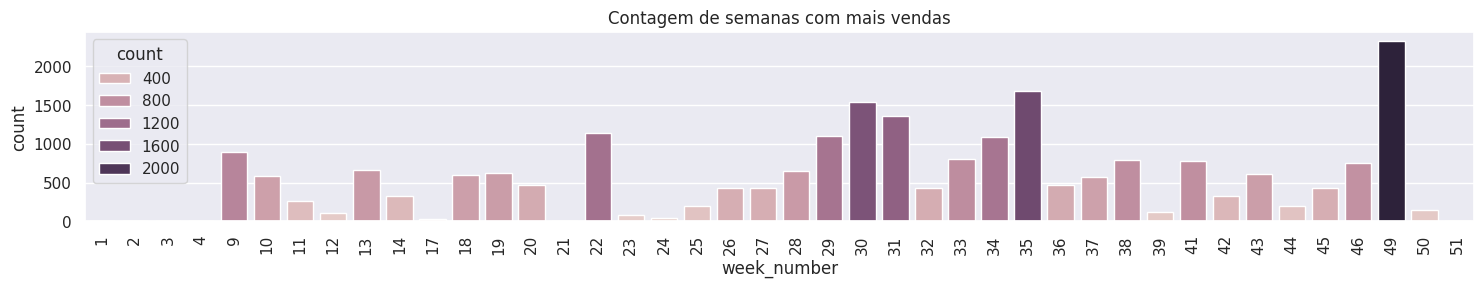

In [26]:
plt.figure(figsize = (15, 3)) #Ajuste o tamanho conforme necessário

semana = pd.DataFrame(df2['week_number'].value_counts()).reset_index()
sns.barplot(x = 'week_number', y = 'count', hue = 'count', data = semana)
plt.title('Contagem de semanas com mais vendas')
plt.tight_layout()
plt.xticks(rotation = 90);

### 2.9 Quais as semanas que mais vendem por comerciante?

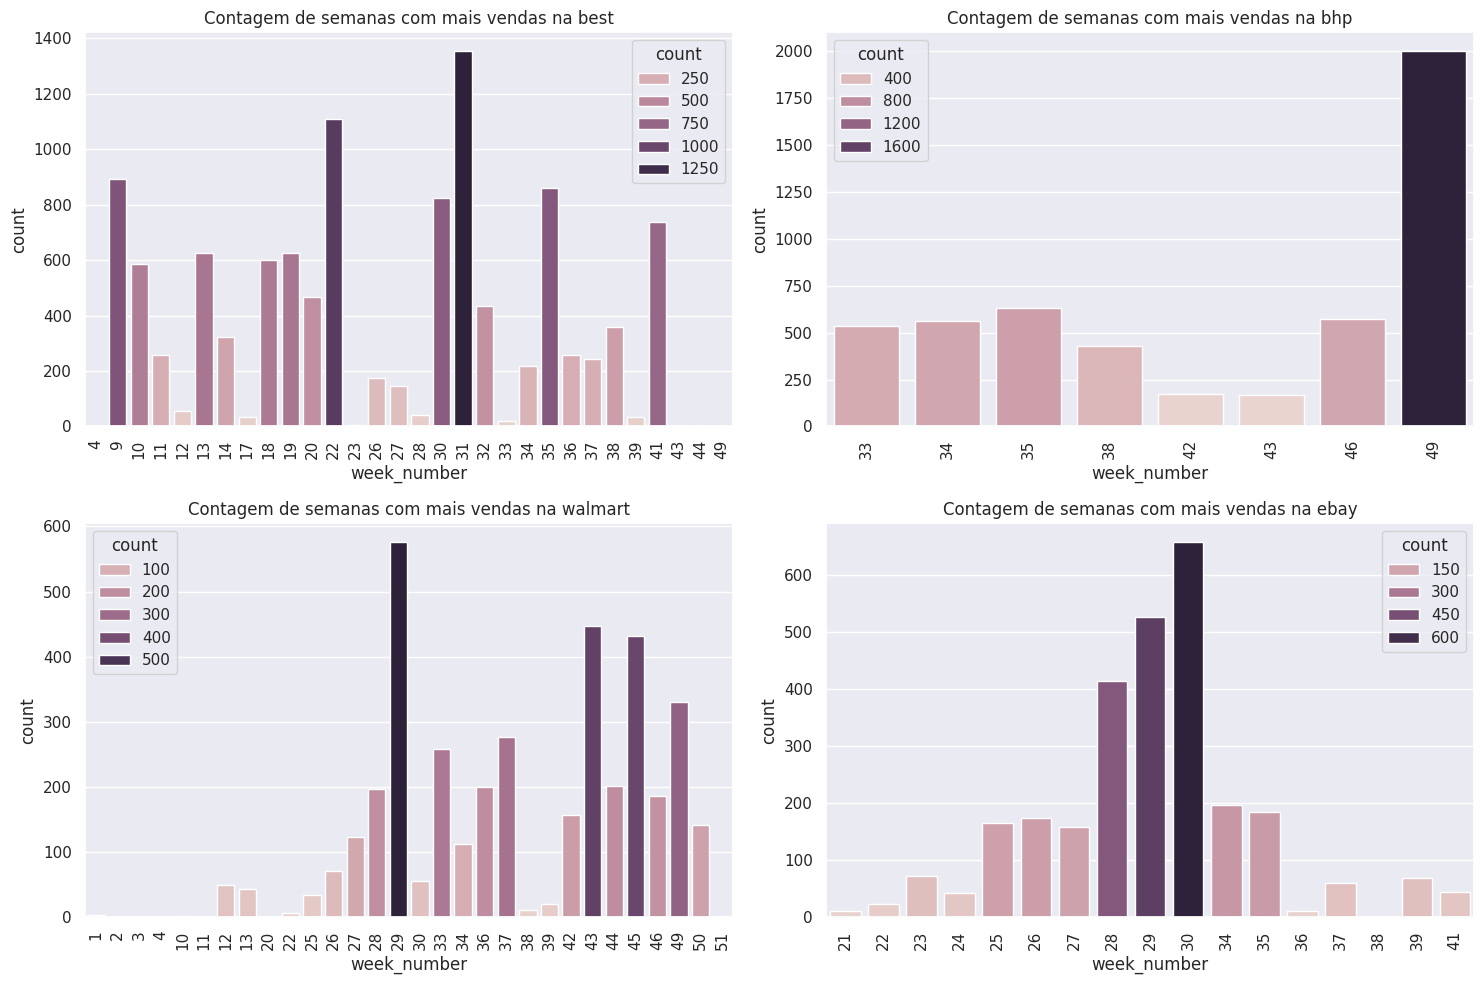

In [27]:
plt.figure(figsize = (15, 10)) #Ajuste o tamanho conforme necessário

plt.subplot(2, 2, 1)
semana_best = df_best.value_counts('week_number').reset_index()

sns.barplot(x = 'week_number', y = 'count', hue = 'count', data = semana_best)
plt.title('Contagem de semanas com mais vendas na best')
plt.tight_layout()
plt.xticks(rotation = 90);

plt.subplot(2, 2, 2)
semana_bhp = df_bhp.value_counts('week_number').reset_index()

sns.barplot(x = 'week_number', y = 'count', hue = 'count', data = semana_bhp)
plt.title('Contagem de semanas com mais vendas na bhp')
plt.tight_layout()
plt.xticks(rotation = 90);

plt.subplot(2, 2, 3)
semana_walmart = df_walmart.value_counts('week_number').reset_index()

sns.barplot(x = 'week_number', y = 'count', hue = 'count', data = semana_walmart)
plt.title('Contagem de semanas com mais vendas na walmart')
plt.tight_layout()
plt.xticks(rotation = 90);

plt.subplot(2, 2, 4)
semana_ebay = df_ebay.value_counts('week_number').reset_index()

sns.barplot(x = 'week_number', y = 'count', hue = 'count', data = semana_ebay)
plt.title('Contagem de semanas com mais vendas na ebay')
plt.tight_layout()
plt.xticks(rotation = 90);

### 2.10 Quais os meses que mais vendem?

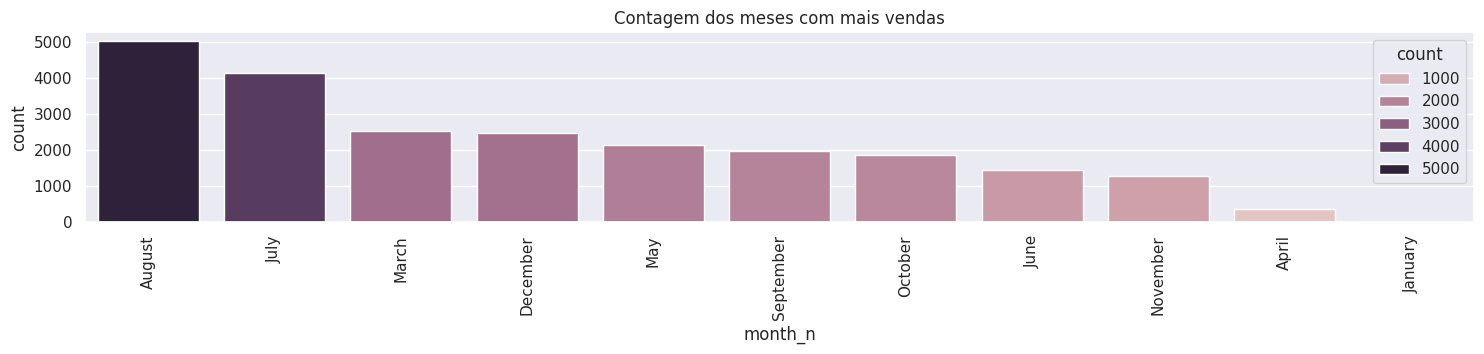

In [28]:
plt.figure(figsize = (15, 3)) #Ajuste o tamanho conforme necessário

mes = pd.DataFrame(df2['month_n'].value_counts()).reset_index()

sns.barplot(x = 'month_n', y = 'count', hue = 'count', data = mes)
plt.title('Contagem dos meses com mais vendas')
plt.tight_layout()
plt.xticks(rotation = 90);

### 2.11 Quais os meses que mais vendem por comerciante?

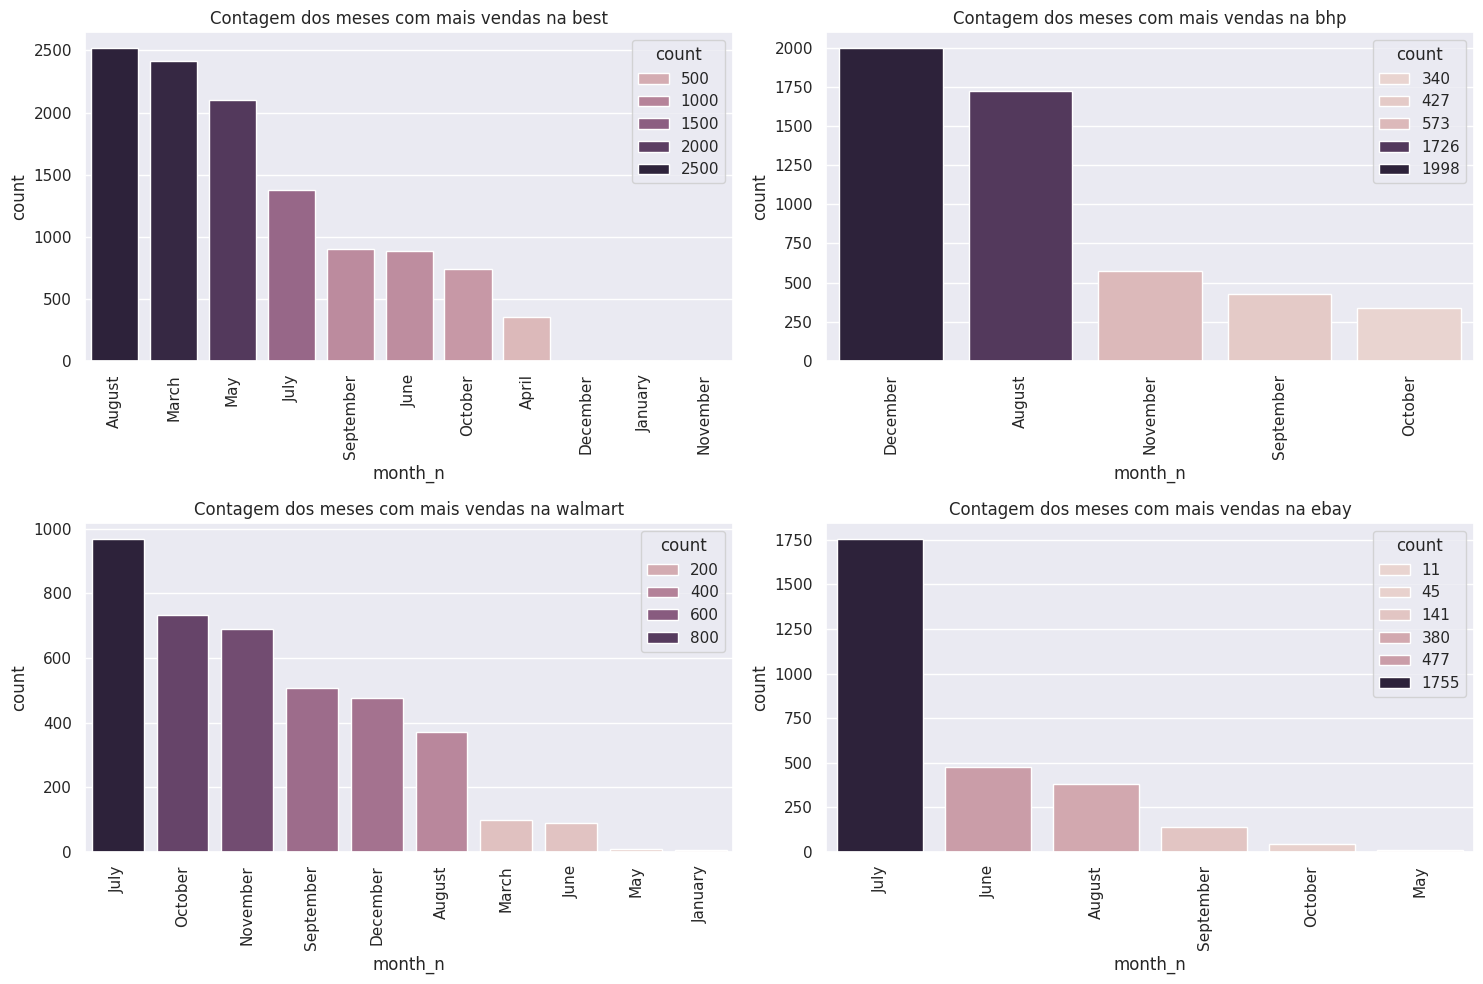

In [29]:
plt.figure(figsize = (15, 10)) #Ajuste o tamanho conforme necessário

plt.subplot(2, 2, 1)
mes_best = df_best.value_counts('month_n').reset_index()

sns.barplot(x = 'month_n', y = 'count', hue = 'count', data = mes_best)
plt.title('Contagem dos meses com mais vendas na best')
plt.tight_layout()
plt.xticks(rotation = 90);

plt.subplot(2, 2, 2)
mes_bhp = df_bhp.value_counts('month_n').reset_index()

sns.barplot(x = 'month_n', y = 'count', hue = 'count', data = mes_bhp)
plt.title('Contagem dos meses com mais vendas na bhp')
plt.tight_layout()
plt.xticks(rotation = 90);

plt.subplot(2, 2, 3)
mes_walmart = df_walmart.value_counts('month_n').reset_index()

sns.barplot(x = 'month_n', y = 'count', hue = 'count', data = mes_walmart)
plt.title('Contagem dos meses com mais vendas na walmart')
plt.tight_layout()
plt.xticks(rotation = 90);

plt.subplot(2, 2, 4)
mes_ebay = df_ebay.value_counts('month_n').reset_index()

sns.barplot(x = 'month_n', y = 'count', hue = 'count', data = mes_ebay)
plt.title('Contagem dos meses com mais vendas na ebay')
plt.tight_layout()
plt.xticks(rotation = 90);

# 3. Passo 3: Filtragem de variáveis (restrição do negócio)

In [30]:
df3 = df_best.drop(columns = ['price', 'merchant', 'disc_percentage', 
                              'is_sale', 'imp_count', 'brand', 'p_description', 
                              'date_added', 'date_seen', 'date_updated', 'manufacturer',
                              'day_n', 'month', 'month_n', 'day'], axis = 1).copy()

In [31]:
df3.head(2)

,date_imp_d,category_name,name,disc_price,week_number
6,2017-10-10,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.99,41
7,2017-08-28,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,66.99,35


# 4. (Limpeza dos dados) Passo 4: Engenharia de variáveis

In [32]:
df4 = df3.copy()

### 4.1 Derivando as variáveis a partir das variáveis originais

In [33]:
df_best_laptop_computer = df4.loc[df_best['category_name'] == 'laptop, computer', :]
df_escolhidos = (df_best_laptop_computer.groupby(['name', 'week_number'])
                                        .agg({'disc_price': 'mean', 'date_imp_d': 'count'})
                                        .reset_index())

In [34]:
df_escolhidos.head()

,name,week_number,disc_price,date_imp_d
0,"12 MacBook (Mid 2017, Gold)",30,1599.99,1
1,"12 MacBook (Mid 2017, Gold)",31,1551.99,8
2,"12 MacBook (Mid 2017, Gold)",33,1454.99,2
3,"12 MacBook (Mid 2017, Gold)",34,1551.99,2
4,"12 MacBook (Mid 2017, Gold)",35,1474.49,4


In [35]:
# Pivotando o dataframe com valores de x
x_preco = df_escolhidos.pivot(index = 'week_number', columns = 'name', values = 'disc_price')
x_preco = pd.DataFrame(x_preco.to_records())

# Pivotando o dataframe com valores de y
y_demanda = df_escolhidos.pivot(index = 'week_number', columns = 'name', values = 'date_imp_d')
y_demanda = pd.DataFrame(y_demanda.to_records())

In [36]:
x_preco.head(3)

,week_number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""","Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Silver""","Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Space Gray""","Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 512GB Flash Storage (Latest Model) - Silver""","Apple 13.3 MacBook Air ( Silver)""","Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 GB flash storage - English""","Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - Intel Core i5 Dual-core (2 Core) 2 GHz - 8 GB LPDDR3 - 256 GB SSD - Mac OS X 10.12 Sierra - 2560 x 1600 - In-plane Switching (IPS) Technology - Silver""","Apple MacBook Pro with Touch Bar - 13.3 - Core i5 - 8 GB RAM - 512 GB SSD - English""","Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen Laptop Intel Core i7 16GB Memory NVIDIA GeForce GTX 950M - 2TB HDD + 512GB SSD - Sandblasted matte black aluminum""","Dell - Inspiron 15.6 Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce GTX 1050 - 1TB + 8GB Hybrid Hard Drive - Red""","Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive - Silver""","Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7-6700HQ 16GB 1TB SSD GTX 960M""","Details About Alienware 13 R3 Aw13r3/13.3 Fhd/i77700hq/nvidia Gtx 1060/16gb/512gb Ssd""","Details About Alienware 15 R3 Aw15r3/15.6 Fhd/i77700hq/nvidia Gtx1070/16gb/1tb Hdd+128gb Ssd""","Details About Apple Macbook Air 13.3 Laptop (early 2015) 2.2ghz Core I7 8gb 256gb""","Details About Asus Q304 13.3 Laptop I5 2.5 Ghz 6gb 1tb Hdd Win 10 (q304uabhi5t11)""","Details About Dell Inspiron I75675650blkpus 15.6 Laptop I57300hq""","Details About Openbox Excellent: Asus Rog Gl502vm 15.6 Laptop Intel Core I7 12gb Me...""","Details About Razer Blade Laptop 14 Full Hd (i77700hq""","Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop""","HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1399.990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,NaN,NaN,426.495,NaN,2799.99,2599.99,NaN,899.99,236.495,1599.99,NaN,NaN,NaN,600.495,1499.99,700.495,1999.99,

### 4.2 Dimensão dos dados

In [37]:
x_preco.shape, y_demanda.shape

((26, 40), (26, 40))

### 4.3 Verificar NA's

In [38]:
x_preco.isna().sum()

week_number                                                                                                                                                                                             0
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                             

In [39]:
y_demanda.isna().sum()

week_number                                                                                                                                                                                             0
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                             

#### 4.3.1 Tratar NA's

In [40]:
mediana = np.round(x_preco.median(), 2)
x_preco.fillna(mediana, inplace = True)

In [41]:
y_demanda.fillna(0, inplace = True)

### 4.4 Descrição estatística

#### 4.4.1 Preço

In [42]:
descricao_estatistica(x_preco)

,min,max,amplitude,mean,median,std,assimetria,kurtosis
week_number,4.000,49.00,45.000,27.076923,29.00,11.945141,-0.186167,-0.905369
"12 MacBook (Mid 2017, Gold)",1454.990,1599.99,145.000,1547.124615,1551.99,25.648346,-2.457686,8.310054
"12 MacBook (Mid 2017, Silver)",1234.990,1299.99,65.000,1295.990000,1299.99,14.317821,-3.735032,13.784949
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,372.995,449.00,76.005,413.189808,415.50,15.423120,-1.054924,2.830858
"13.3 MacBook Air (Mid 2017, Silver)",911.990,969.99,58.000,949.297692,949.99,8.393080,-2.975611,16.702015
"15.4 MacBook Pro with Touch Bar (Late 2016, Silver)",2327.990,2799.99,472.000,2607.393846,2618.99,112.833610,-1.131897,2.049122
"15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",2023.990,2599.99,576.000,2346.913077,2353.99,122.523757,-0.274833,1.347179
ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,237.490,313.49,76.000,299.720769,304.99,16.347918,-2.916993,8.218479
"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",764.990,899.99,135.000,834.028462,829.99,27.804926,0.937281,2.943939
Acer 15.6 Chromebook CB5-571-C4G4,199.990,249.00,49.010,242.479231,249.00,14.017001,-2.306458,4.514429


#### 4.4.2 Demanda

In [43]:
descricao_estatistica(y_demanda)

,min,max,amplitude,mean,median,std,assimetria,kurtosis
week_number,4.0,49.0,45.0,27.076923,29.0,11.945141,-0.186167,-0.905369
"12 MacBook (Mid 2017, Gold)",0.0,8.0,8.0,0.961538,0.0,1.764626,2.738840,9.024976
"12 MacBook (Mid 2017, Silver)",0.0,2.0,2.0,0.384615,0.0,0.624926,1.474017,1.189701
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,0.0,4.0,4.0,1.038462,0.5,1.125945,0.606680,-0.428079
"13.3 MacBook Air (Mid 2017, Silver)",0.0,2.0,2.0,0.384615,0.0,0.788227,1.658711,0.807453
"15.4 MacBook Pro with Touch Bar (Late 2016, Silver)",0.0,6.0,6.0,1.153846,0.0,1.609881,1.437577,1.673167
"15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",0.0,12.0,12.0,3.230769,1.0,3.885948,0.951022,-0.225438
ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,0.0,2.0,2.0,0.538462,0.0,0.887120,1.105353,-0.849951
"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",0.0,2.0,2.0,0.384615,0.0,0.624926,1.474017,1.189701
Acer 15.6 Chromebook CB5-571-C4G4,0.0,4.0,4.0,0.769231,1.0,0.932643,1.711207,4.066693


### 4.5 Análise exploratória dos dados

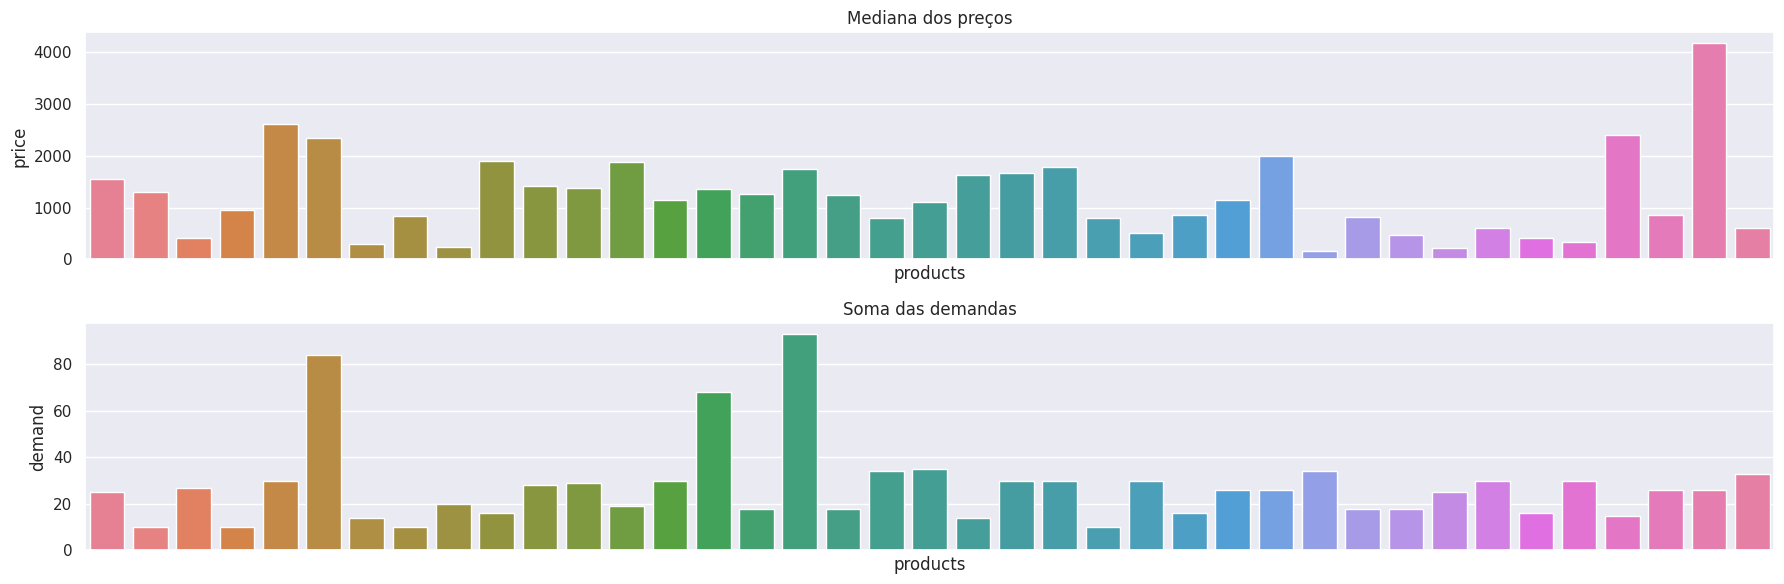

In [44]:
x_preco_ = x_preco.drop(columns = 'week_number', axis = 1)
aux1 = pd.DataFrame(x_preco_.apply(lambda x: x.median())).reset_index()
aux1.columns = ['products', 'price']

y_demanda_ = y_demanda.drop(columns = 'week_number', axis = 1)
aux2 = pd.DataFrame(y_demanda_.apply(lambda x: x.sum())).reset_index()
aux2.columns = ['products', 'demand']

fig, axes = plt.subplots(2, 1, figsize = (18, 6))  # 2 linhas, 1 coluna

sns.barplot(ax = axes[0], x = 'products', y = 'price', hue = 'products', data = aux1, legend = False)
axes[0].set_title('Mediana dos preços')
axes[0].tick_params(axis = 'x', labelrotation = 45)  # Rotação dos rótulos do eixo x
axes[0].set_xticks([])  # Remover os rótulos do eixo x

sns.barplot(ax = axes[1], x = 'products', y = 'demand', hue = 'products', data = aux2, legend = False)
axes[1].set_title('Soma das demandas')
axes[1].tick_params(axis = 'x', labelrotation = 45)  # Rotação dos rótulos do eixo x
axes[1].set_xticks([])  # Remover os rótulos do eixo x

plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show();

# 5. Passo 5: R_quadrado e P_valor

### 5.1 Método dos mínimos quadrados

#### 5.1.1 Para um produto

In [45]:
# BestBuy -> 'laptop, computer'
x_laptop_computer = x_preco['12 MacBook (Mid 2017, Gold)']
y_laptop_computer = y_demanda['12 MacBook (Mid 2017, Gold)']
x_ = sm.add_constant(x_laptop_computer)
modelo = sm.OLS(y_laptop_computer, x_)
resultado = modelo.fit()
print(resultado.summary())

                                 OLS Regression Results                                
Dep. Variable:     12 MacBook (Mid 2017, Gold)   R-squared:                       0.081
Model:                                     OLS   Adj. R-squared:                  0.042
Method:                          Least Squares   F-statistic:                     2.108
Date:                         Tue, 13 Feb 2024   Prob (F-statistic):              0.159
Time:                                 06:07:54   Log-Likelihood:                -50.564
No. Observations:                           26   AIC:                             105.1
Df Residuals:                               24   BIC:                             107.6
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

#### 5.1.2 Para vários produtos

In [46]:
resultado_valor_laptop_computer = {'nome': [], 
                                   'elasticidade_de_preco': [], 
                                   'media_de_preco': [], 
                                   'media_de_demanda': [], 
                                   'intercept': [], 
                                   'coef_ang': [], 
                                   'r_quadrado': [], 
                                   'p_valor': []}

for column in x_preco.columns[1:]:
    column_point = []
    for i in range(len(x_preco[column])):
        column_point.append((x_preco[column][i], y_demanda[column][i]))

    df = pd.DataFrame(list(column_point), columns = ['x_preco', 'y_demanda'])
        
    x_laptop_computer = df['x_preco']
    y_laptop_computer = df['y_demanda']
    x_ = sm.add_constant(x_laptop_computer)
    modelo = sm.OLS(y_laptop_computer, x_)
    resultado = modelo.fit()

    if resultado.f_pvalue < 0.05: # Este é o p_valor, onde significa que se o metodo não acertar 95% das
        # vezes, é descartado pois não tem significância estatistica
        r_quadrado = resultado.rsquared
        p_valor = resultado.f_pvalue
        intercept, coef_ang = resultado.params # intercept = coef linear, slope = coef angular
        
        # Correção aqui: calcular médias antes de usar
        media_preco = np.mean(x_laptop_computer)
        media_demanda = np.mean(y_laptop_computer)
        
        elasticidade_de_preco = coef_ang * (media_preco / media_demanda)

        resultado_valor_laptop_computer['nome'].append(column)
        resultado_valor_laptop_computer['elasticidade_de_preco'].append(elasticidade_de_preco)
        resultado_valor_laptop_computer['media_de_preco'].append(media_preco)
        resultado_valor_laptop_computer['media_de_demanda'].append(media_demanda)
        resultado_valor_laptop_computer['intercept'].append(intercept)
        resultado_valor_laptop_computer['coef_ang'].append(coef_ang)
        resultado_valor_laptop_computer['r_quadrado'].append(r_quadrado)
        resultado_valor_laptop_computer['p_valor'].append(p_valor)

df_elasticidade = pd.DataFrame.from_dict(resultado_valor_laptop_computer)
df_elasticidade

,nome,elasticidade_de_preco,media_de_preco,media_de_demanda,intercept,coef_ang,r_quadrado,p_valor
0,"12 MacBook (Mid 2017, Silver)",-65.115595,1295.990000,0.384615,25.429075,-0.019325,0.196027,0.023508
1,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,-16.039643,299.720769,0.538462,9.175192,-0.028816,0.281984,0.005251
2,Acer 15.6 Chromebook CB5-571-C4G4,-8.432545,242.479231,0.769231,7.255804,-0.026751,0.161645,0.041743
3,Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...,-6.018642,1224.221154,0.692308,4.859060,-0.003404,0.236464,0.011774
4,Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...,-23.203537,790.759231,1.307692,31.650779,-0.038372,0.327839,0.002237
5,Details About Apple Macbook Air 13.3 Laptop (e...,-68.165723,795.509231,0.384615,26.602201,-0.032957,0.510312,0.000041
6,Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...,-6.049399,209.663077,0.961538,6.778268,-0.027743,0.277667,0.005677


In [47]:
path = '/home/leonardo/projetos_/elasticidade_de_preco/dataset'
df_elasticidade.to_csv(path + '/df_elasticidade.csv')

# 6. Passo 6: Elasticidade

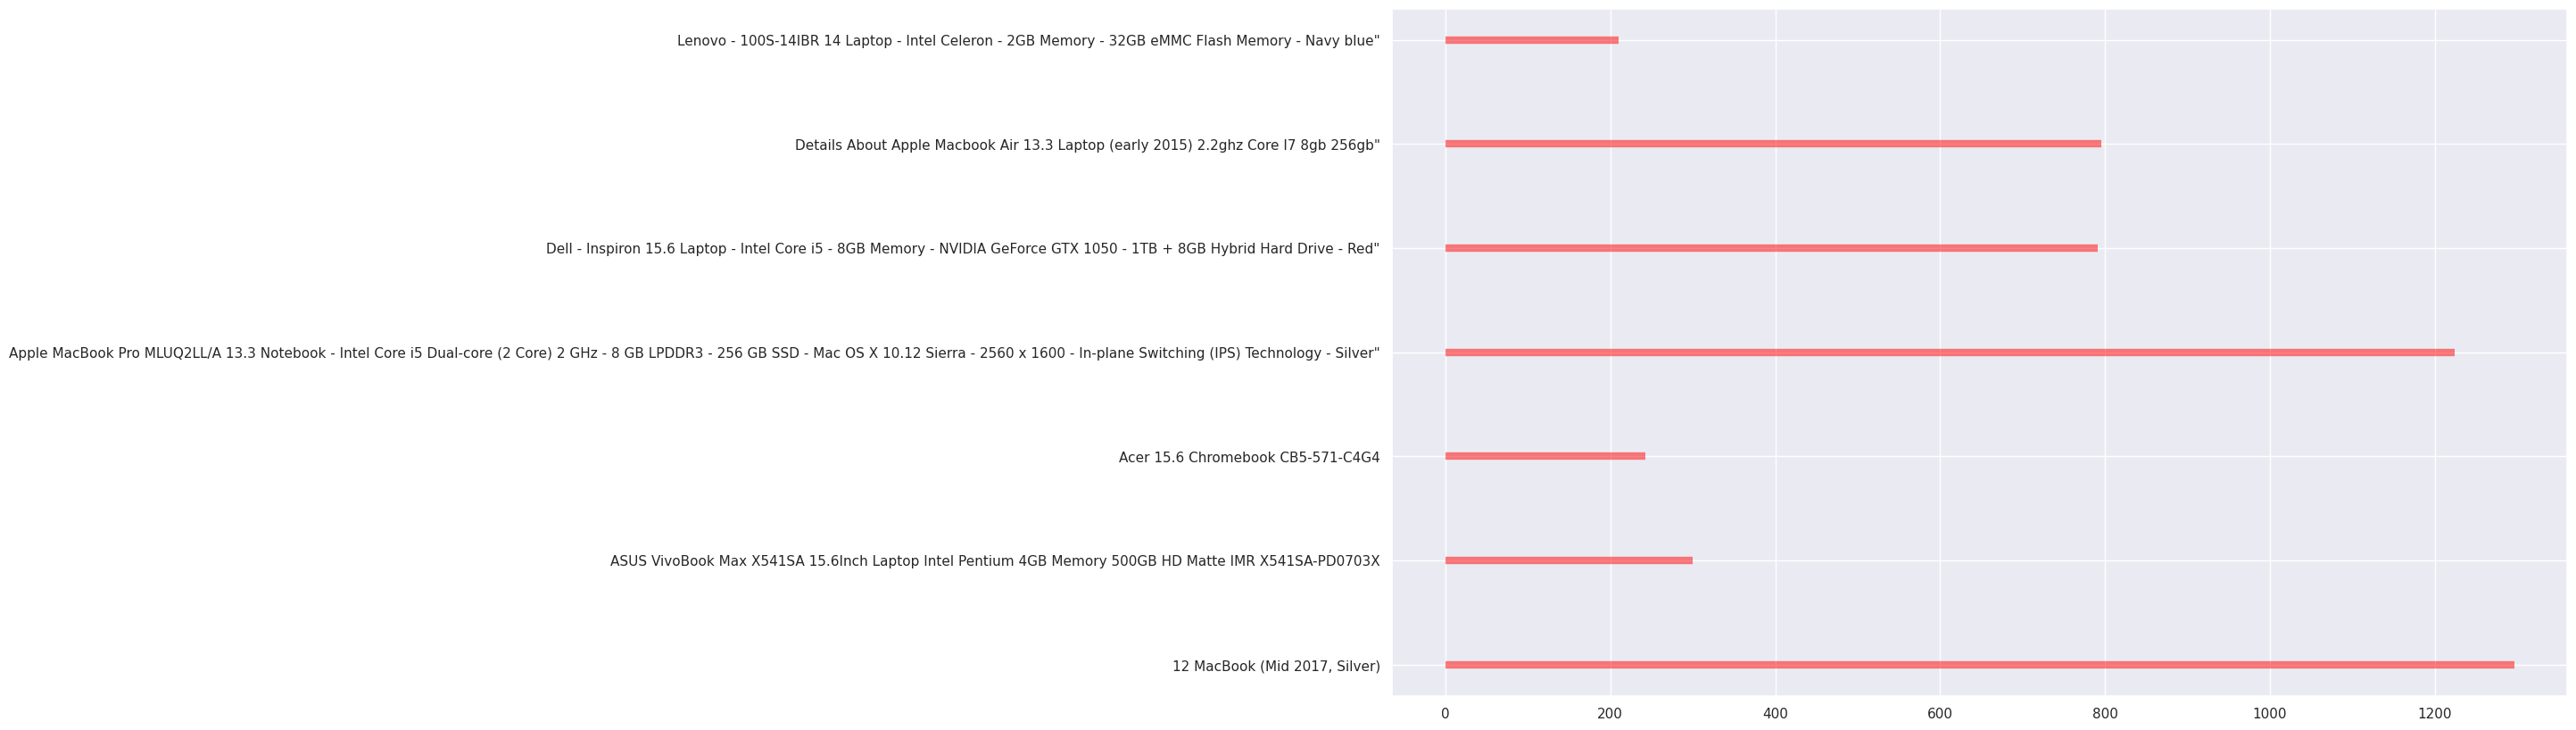

In [48]:
df_elasticidade['ranking'] = df_elasticidade.loc[:, 'elasticidade_de_preco'].rank(ascending = False).astype(int)

df_elasticidade.reset_index(drop = True)

plt.figure(figsize = (17, 10))
plt.hlines(y = df_elasticidade['nome'], xmin = 0, xmax = df_elasticidade['media_de_preco'], alpha = 0.5, linewidth = 6, color = 'red');

In [49]:
df_elasticidade.columns

Index(['nome', 'elasticidade_de_preco', 'media_de_preco', 'media_de_demanda',
       'intercept', 'coef_ang', 'r_quadrado', 'p_valor', 'ranking'],
      dtype='object')

In [50]:
df_elasticidade_ordenada = (df_elasticidade[['ranking', 'nome', 'elasticidade_de_preco']].drop_duplicates()
                                                                                         .sort_values('elasticidade_de_preco', ascending = False))
df_elasticidade_ordenada

,ranking,nome,elasticidade_de_preco
3,1,Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...,-6.018642
6,2,Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...,-6.049399
2,3,Acer 15.6 Chromebook CB5-571-C4G4,-8.432545
1,4,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,-16.039643
4,5,Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...,-23.203537
0,6,"12 MacBook (Mid 2017, Silver)",-65.115595
5,7,Details About Apple Macbook Air 13.3 Laptop (e...,-68.165723


# 7. Passo 7: Performance do negócio

### 7.1 Para todos os produtos

In [51]:
resultado_faturamento = {'nome': [], 
                         'faturamento_atual': [], 
                         'faturamento_reducao': [], 
                         'faturamento_perda': [], 
                         'faturamento_novo': [], 
                         'variacao_faturamento': [], 
                         'variacao_percentual': []}

for i in range(len(df_elasticidade_ordenada)):
    preco_atual_medio = x_preco[df_elasticidade_ordenada['nome'][i]].mean()    
    demanda_atual = y_demanda[df_elasticidade_ordenada['nome'][i]].sum()    
    reducao_preco = preco_atual_medio * 0.9    
    aumento_demanda = - 0.1 * df_elasticidade_ordenada['elasticidade_de_preco'][i]
    demanda_nova = aumento_demanda * demanda_atual
    faturamento_atual = round(preco_atual_medio * demanda_atual, 2)
    faturamento_novo = round(reducao_preco * demanda_nova, 2)    
    faturamento_reducao = round(faturamento_atual * 0.9, 2)
    faturamento_perda = round(faturamento_atual - faturamento_reducao, 2)
    variacao_faturamento = round(faturamento_novo - faturamento_atual, 2)
    variacao_percentual = round(((faturamento_novo - faturamento_atual) / faturamento_atual) * 100, 2)

    resultado_faturamento['nome'].append(df_elasticidade_ordenada['nome'][i])
    resultado_faturamento['faturamento_atual'].append(faturamento_atual)
    resultado_faturamento['faturamento_reducao'].append(faturamento_reducao)
    resultado_faturamento['faturamento_perda'].append(faturamento_perda)
    resultado_faturamento['faturamento_novo'].append(faturamento_novo)
    resultado_faturamento['variacao_faturamento'].append(variacao_faturamento)
    resultado_faturamento['variacao_percentual'].append(variacao_percentual)
    
df_resultado = pd.DataFrame(resultado_faturamento)
df_resultado

,nome,faturamento_atual,faturamento_reducao,faturamento_perda,faturamento_novo,variacao_faturamento,variacao_percentual
0,"12 MacBook (Mid 2017, Silver)",12959.90,11663.91,1295.99,75950.24,62990.34,486.04
1,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,4196.09,3776.48,419.61,6057.34,1861.25,44.36
2,Acer 15.6 Chromebook CB5-571-C4G4,4849.58,4364.62,484.96,3680.49,-1169.09,-24.11
3,Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...,22035.98,19832.38,2203.60,11936.40,-10099.58,-45.83
4,Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...,26885.81,24197.23,2688.58,56146.14,29260.33,108.83
5,Details About Apple Macbook Air 13.3 Laptop (e...,7955.09,7159.58,795.51,48803.82,40848.73,513.49
6,Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...,5241.58,4717.42,524.16,2853.75,-2387.83,-45.56


In [52]:
path = '/home/leonardo/projetos_/elasticidade_de_preco/dataset'
df_resultado.to_csv(path + '/df_resultado_negocio.csv')

### 7.2 Para um produto

In [53]:
preco_atual_medio = round(x_preco['Details About Apple Macbook Air 13.3 Laptop (early 2015) 2.2ghz Core I7 8gb 256gb"'].mean(), 2)   
demanda_atual = y_demanda['Details About Apple Macbook Air 13.3 Laptop (early 2015) 2.2ghz Core I7 8gb 256gb"'].sum()    

reducao_preco = round(preco_atual_medio * 0.9, 2)    
aumento_demanda = - 0.1 * df_elasticidade_ordenada['elasticidade_de_preco'][5]

demanda_nova = aumento_demanda * demanda_atual
faturamento_atual = round(preco_atual_medio * demanda_atual, 2)
faturamento_novo = round(reducao_preco * demanda_nova, 2)    
faturamento_reducao = round(faturamento_atual * 0.9, 2)

print('Análise para o produto: {}'.format('Details About Apple Macbook Air 13.3 Laptop (early 2015) 2.2ghz Core I7 8gb 256gb'))
print('-' * 105)
print('O preço atual médio é de {}, e com a redução de 10% sugerida seria {},'.format(preco_atual_medio, reducao_preco))
print('portanto diminuiria {}. Mas com o aumento de demanda devido a redução de'.format(round(preco_atual_medio - reducao_preco, 2)))
print('preço, o faturamento atualizado deste produto seria de {}, gerando um'.format(faturamento_novo))
print('incremento de {} devido sua elasticidade elevada.'.format(round(faturamento_novo - faturamento_atual, 2)))

Análise para o produto: Details About Apple Macbook Air 13.3 Laptop (early 2015) 2.2ghz Core I7 8gb 256gb
---------------------------------------------------------------------------------------------------------
O preço atual médio é de 795.51, e com a redução de 10% sugerida seria 715.96,
portanto diminuiria 79.55. Mas com o aumento de demanda devido a redução de
preço, o faturamento atualizado deste produto seria de 48803.93, gerando um
incremento de 40848.83 devido sua elasticidade elevada.
